In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns


all_df=pd.read_csv('Results_21MAR2022_nokcaladjust.csv', index_col=False)
all_df.head()

mc_run_id           grouping  mean_ghgs  mean_land  mean_watscar  \
0          1  fish_female_20-29   5.377071   8.589807   14012.27478   
1          1  fish_female_30-39   5.376457   8.620238   15030.26610   
2          1  fish_female_40-49   5.169838   8.304831   15441.25934   
3          1  fish_female_50-59   4.933744   7.880759   16244.68021   
4          1  fish_female_60-69   5.428442   8.701867   18364.95302   

    mean_eut  mean_ghgs_ch4  mean_ghgs_n2o    mean_bio  mean_watuse  ...  \
0  23.553012       1.165277       0.344528  478.802638   669.154382  ...   
1  23.831419       1.152422       0.326276  469.573862   697.161548  ...   
2  23.419815       1.095640       0.305898  435.534050   687.733569  ...   
3  23.459450       0.995247       0.285800  382.097727   686.763592  ...   
4  25.469176       1.127873       0.315651  435.578230   751.050809  ...   

      sd_eut  sd_ghgs_ch4  sd_ghgs_n2o      sd_bio   sd_watuse    sd_acid  \
0  13.788241     0.913103     0.238819  400.289973  402.372408  13.774998   
1  13.466037     0.845564     0.210539  375.301226  420.147350  13.077207   
2  12.692978     0.773937     0.190561  333.613445  404.151916  12.959012   
3  13.825273     0.669932     0.166206  271.061989  429.965087  13.155250   
4  14.538055     0.907853     0.196968  396.811097  471.376883  14.177048   

   n_participants     sex  diet_group  age_group  
0            1329  female        fish      20-29  
1            2024  female        fish      30-39  
2            1689  female        fish      40-49  
3             946  female        fish      50-59  
4             492  female        fish      60-69  

[5 rows x 24 columns]

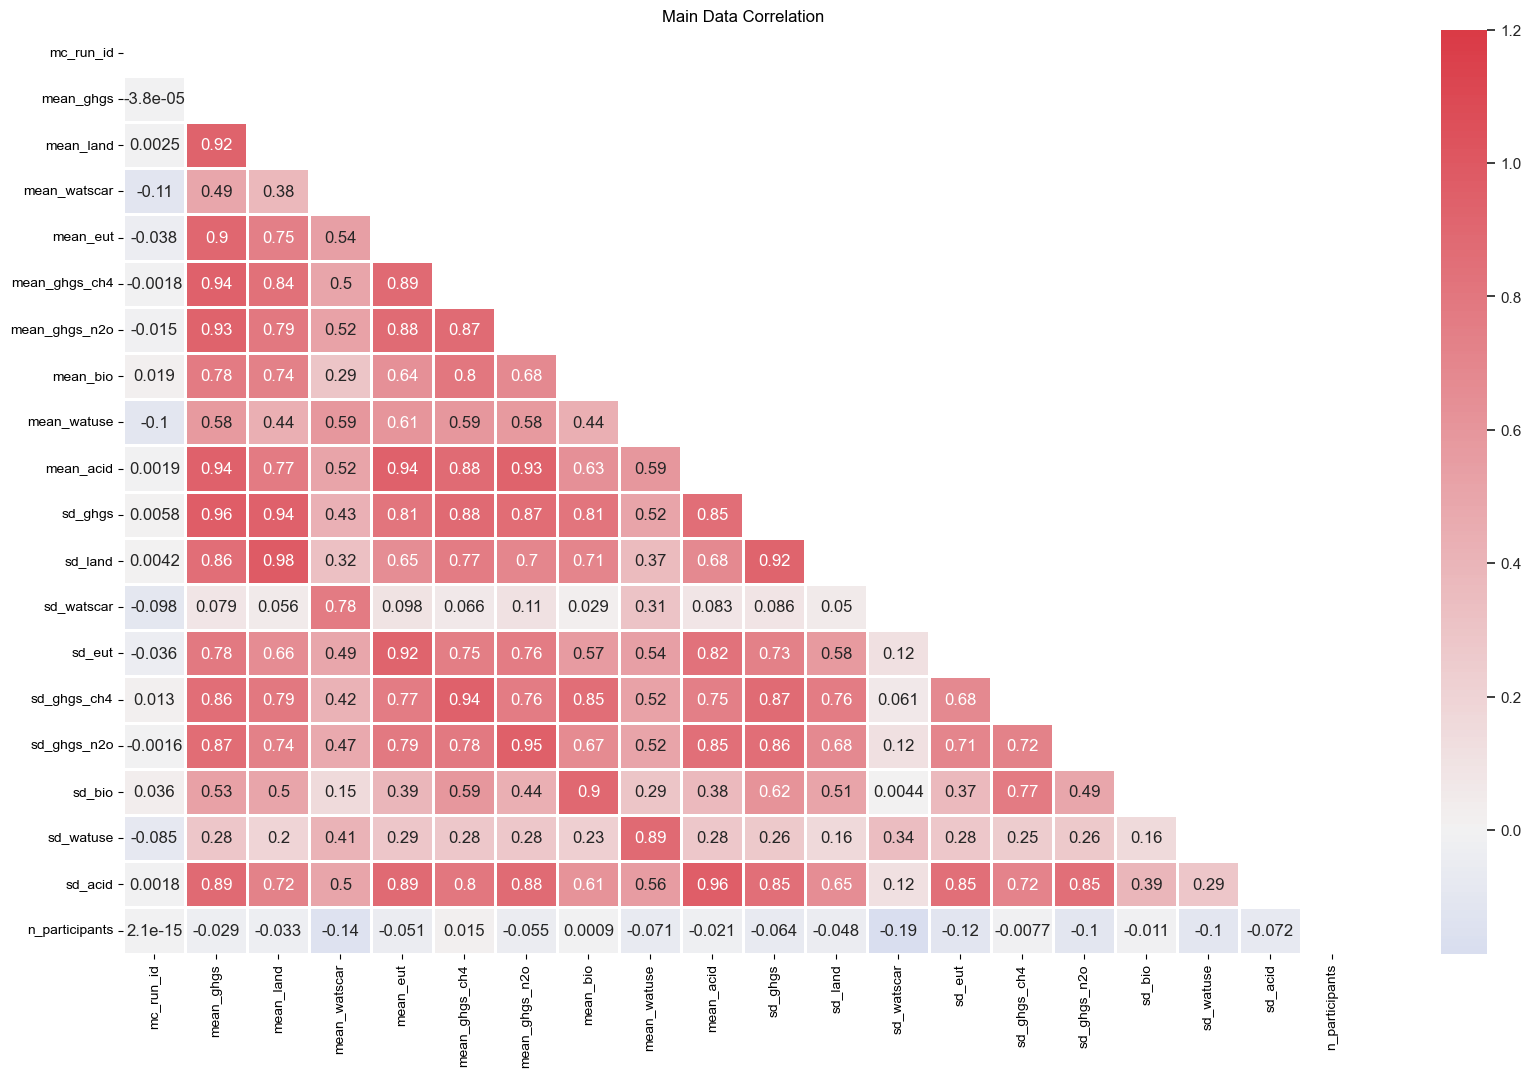

In [2]:
corrMatt = all_df.corr(numeric_only=True)   
mask = np.zeros_like(corrMatt)              
mask[np.triu_indices_from(mask)] = True     
fig, ax = plt.subplots(figsize=(20, 12))  
plt.title('Main Data Correlation')
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.set(font_scale=1)
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,center=0,
ax=ax, annot=True, fmt='.2g', linewidths=1)
plt.savefig('heatmap.png')

/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

mc_run_id           grouping  mean_ghgs  mean_land  mean_watscar  mean_eut  \
0        0.0  fish_female_20-29   0.146738   0.063621      0.123640  0.153460   
1        0.0  fish_female_30-39   0.146714   0.063949      0.137388  0.155965   
2        0.0  fish_female_40-49   0.138615   0.060551      0.142938  0.152262   
3        0.0  fish_female_50-59   0.129360   0.055982      0.153788  0.152618   
4        0.0  fish_female_60-69   0.148752   0.064828      0.182421  0.170700   

   mean_ghgs_ch4  mean_ghgs_n2o  mean_bio  mean_watuse  ...    sd_eut  \
0       0.150321       0.119074  0.226080     0.129890  ...  0.132997   
1       0.148559       0.109788  0.221237     0.137146  ...  0.128597   
2       0.140779       0.099422  0.203374     0.134703  ...  0.118040   
3       0.127022       0.089198  0.175331     0.134452  ...  0.133502   
4       0.145195       0.104383  0.203397     0.151108  ...  0.143236   

   sd_ghgs_ch4  sd_ghgs_n2o    sd_bio  sd_watuse   sd_acid  n_participants  \
0     0.172049     0.158139  0.276835   0.080804  0.201287        0.350924   
1     0.158522     0.132238  0.257869   0.085783  0.187313        0.537102   
2     0.144176     0.113940  0.226229   0.081303  0.184947        0.447361   
3     0.123345     0.091633  0.178754   0.088533  0.188876        0.248326   
4     0.170998     0.119808  0.274194   0.100133  0.209338        0.126708   

      sex  diet_group  age_group  
0  female        fish      20-29  
1  female        fish      30-39  
2  female        fish      40-49  
3  female        fish      50-59  
4  female        fish      60-69  

[5 rows x 24 columns]

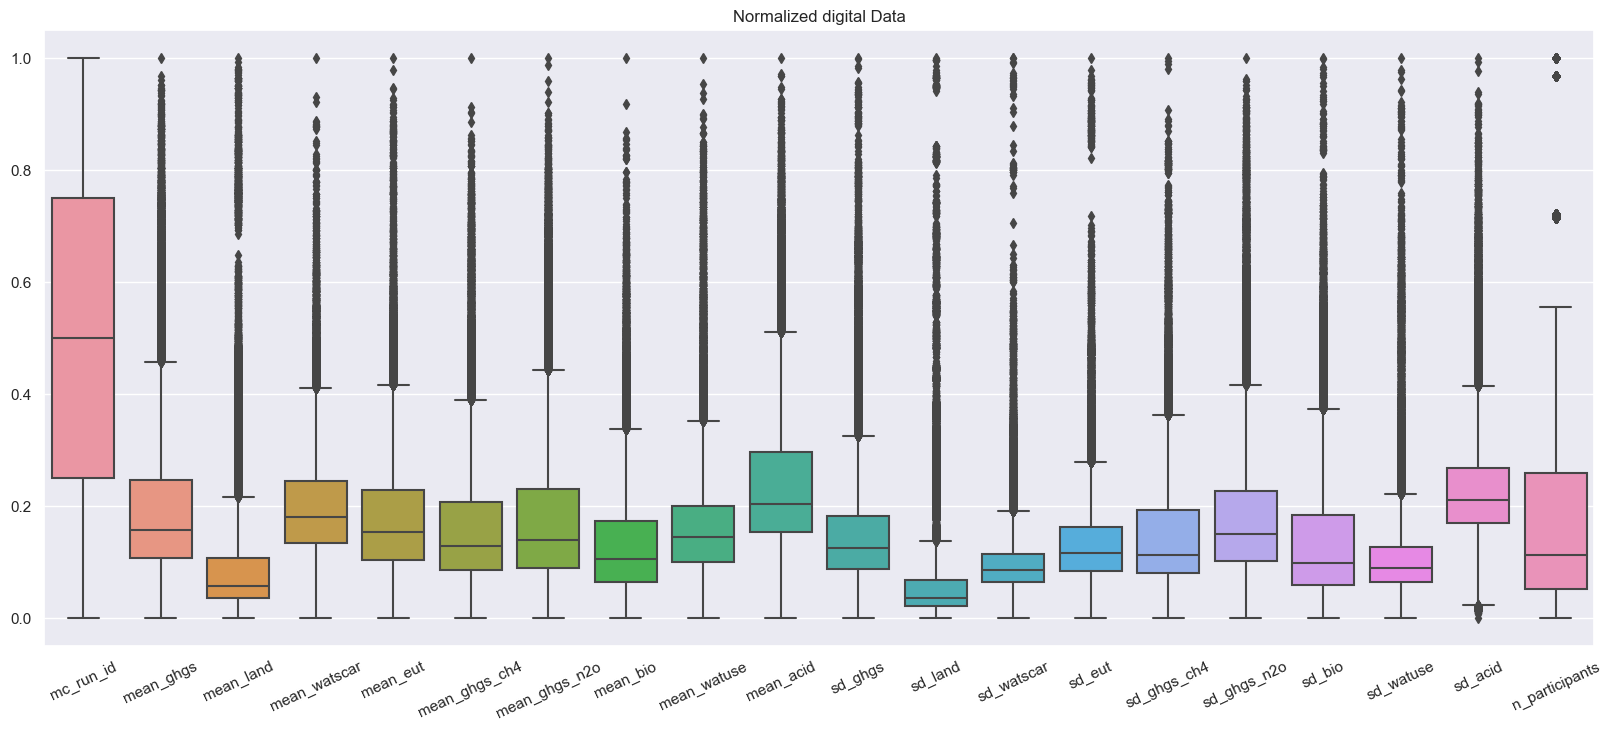

In [4]:
for column in all_df.select_dtypes(include=[np.number]).columns :
    if column :
        all_df[column] = (all_df[column] - all_df[column].min()) / (all_df[column].max() - all_df[column].min())
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=all_df,ax=ax) 
plt.title('Normalized digital Data')
plt.xticks(rotation=25)
plt.savefig('boxplot.png')
all_df.head()

/var/folders/h6/997_hqpj08vbfw0_1ddgs11r0000gn/T/ipykernel_7268/3617910670.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_df.replace([np.inf, -np.inf], np.nan, inplace=True)


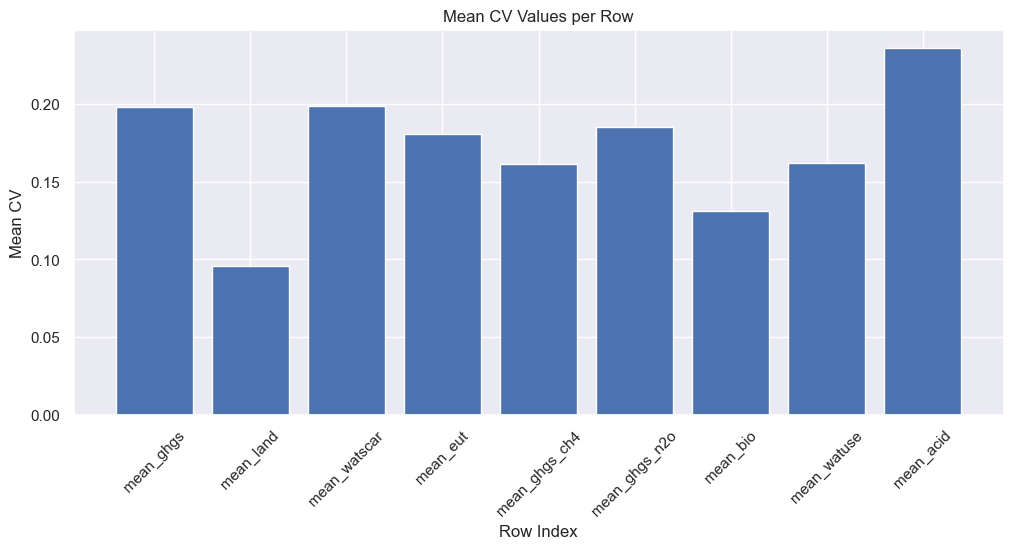

In [6]:
mean_values = {}
sd_values= {}
for col in all_df.columns:
    if col.startswith('mean_'):
        mean_values[col] = all_df[col]
        
        sd_col = 'sd' + col[4:]   
        cv_col = 'cv' + col[4:]   
         if sd_col in all_df.columns:
            all_df[cv_col] = all_df[sd_col] / all_df[col]
    if col.startswith('sd_'):
        sd_values[col] = all_df[col]

mean_df = pd.DataFrame(mean_values)
sd_df = pd.DataFrame(sd_values)
mean_col = mean_df.mean()

grouped_means = mean_df.groupby(all_df['diet_group']).mean()
sex = mean_df.groupby(all_df['sex']).mean()
age = mean_df.groupby(all_df['age_group']).mean()

grouped_sd = sd_df.groupby(all_df['diet_group']).mean()
sex_sd = sd_df.groupby(all_df['sex']).mean()
age_sd = sd_df.groupby(all_df['age_group']).mean()

cv_df = all_df.filter(regex='^cv_')
# print(cv_df.head())
# Let's try a more direct method to avoid recursion issues.

# We will replace 'inf' with NaN directly using numpy
import numpy as np

cv_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Dropping rows with NaN values
cv_df_dropped = cv_df.dropna()
# Imputing NaN values with the mean of the column (ignoring NaN in the calculation)
cv_df_imputed = cv_df.fillna(cv_df.mean(skipna=True))
# Display the resulting DataFrames to check if the operation was successful
(cv_df_dropped, cv_df_imputed)
# define CV

cv_mean = [cv_df[col].mean() for col in cv_df.columns]


plt.figure(figsize=(12, 5))
plt.bar(mean_col.index, mean_col.values)
plt.title('Mean CV Values per Row')
plt.xlabel('Row Index')
plt.xticks(rotation=45)

plt.ylabel('Mean CV')
plt.show()

# fig,ax=plt.subplots(1,figsize=(20,8))
# sns.boxplot(data=cv_df,ax=ax) 


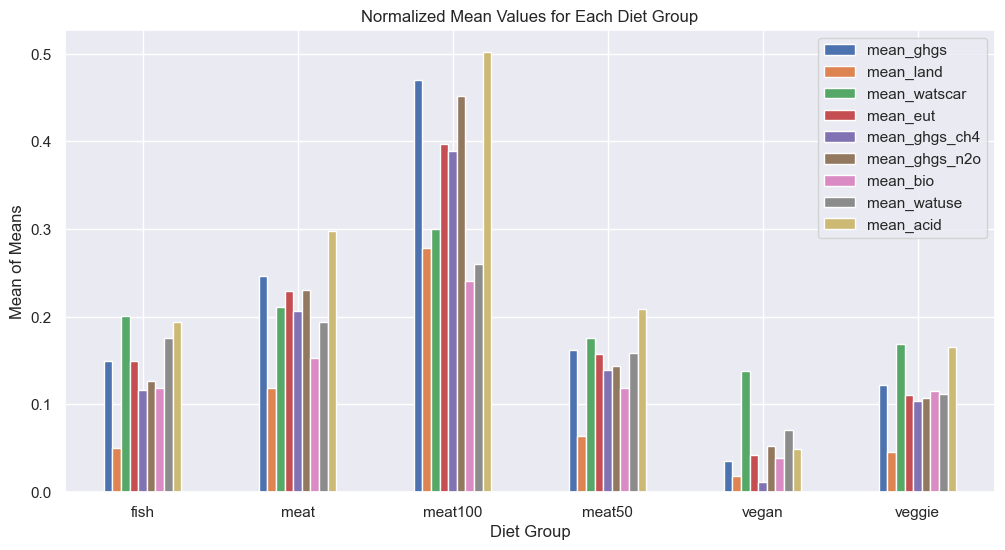

In [7]:
grouped_means.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Diet Group')
plt.ylabel('Mean of Means')
plt.title('Normalized Mean Values for Each Diet Group')
plt.xticks(rotation=0)
plt.savefig('Normalized Mean Values for Each Diet Group.png')

plt.show()
# plt.savefig('Normalized Mean Values for Each Diet Group.png')


/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


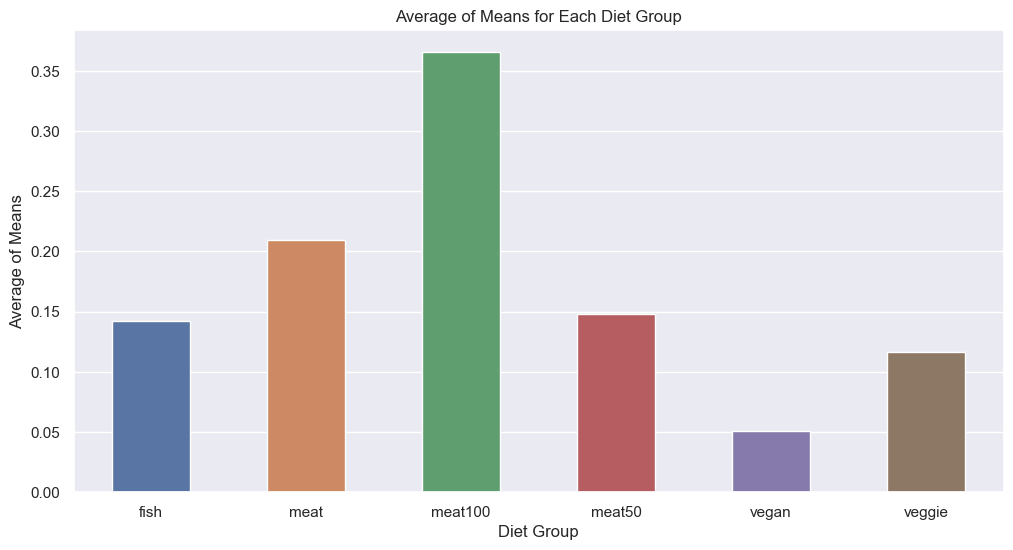

In [8]:
# Calculate the mean across all 'mean_' columns for each row
category_averages = grouped_means.mean(axis=1)

# Create a new DataFrame with these averages and the corresponding diet group as the index
averages_df = pd.DataFrame({'Average Mean': category_averages})
averages_df['Diet Group'] = grouped_means.index

# Now plot the category-wise averages
plt.figure(figsize=(12, 6))
sns.barplot(x='Diet Group', y='Average Mean', data=averages_df, width=0.5)
plt.title('Average of Means for Each Diet Group')
plt.xlabel('Diet Group')
plt.ylabel('Average of Means')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

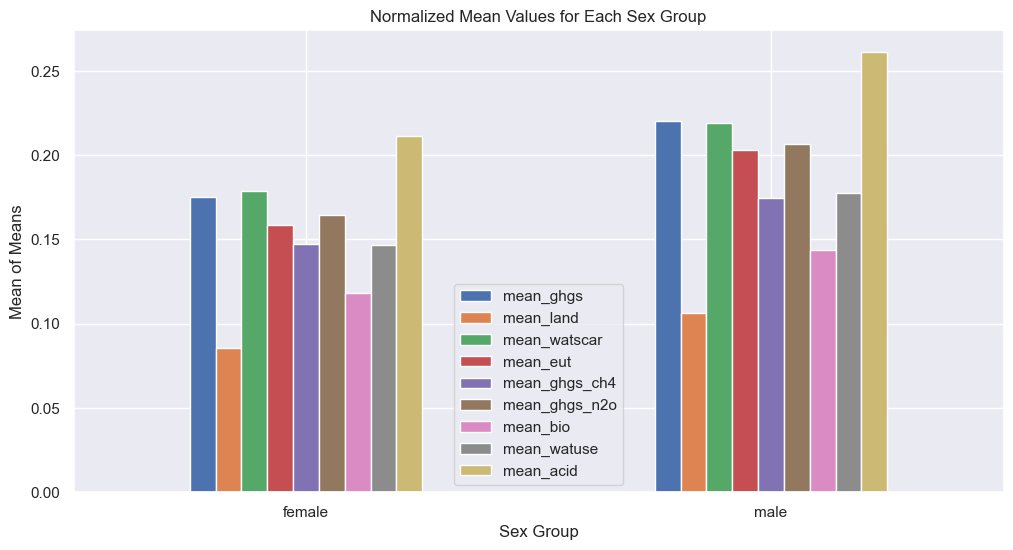

In [18]:
sex.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Sex Group')
plt.ylabel('Mean of Means')
plt.title('Normalized Mean Values for Each Sex Group')
plt.xticks(rotation=0)
plt.show()

/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


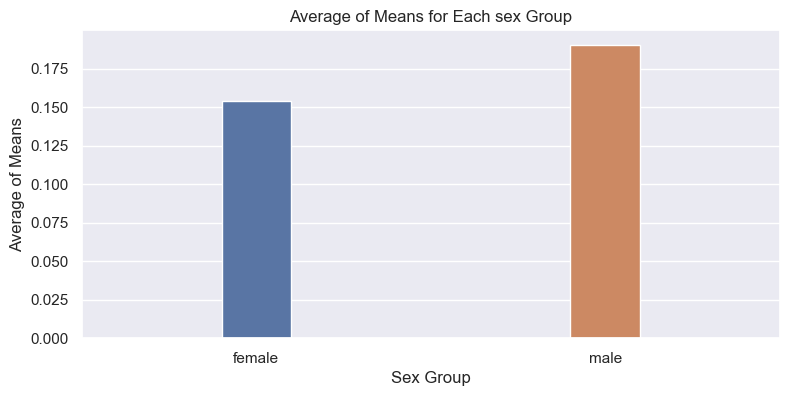

In [17]:
# Calculate the mean across all 'mean_' columns for each row
category_averages = sex.mean(axis=1)

# Create a new DataFrame with these averages and the corresponding diet group as the index
averages_df = pd.DataFrame({'Average Mean': category_averages})
averages_df['Diet Group'] = sex.index

# Now plot the category-wise averages
plt.figure(figsize=(9, 4))
sns.barplot(x='Diet Group', y='Average Mean', data=averages_df, width=0.2)
plt.title('Average of Means for Each sex Group')
plt.xlabel('Sex Group')
plt.ylabel('Average of Means')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

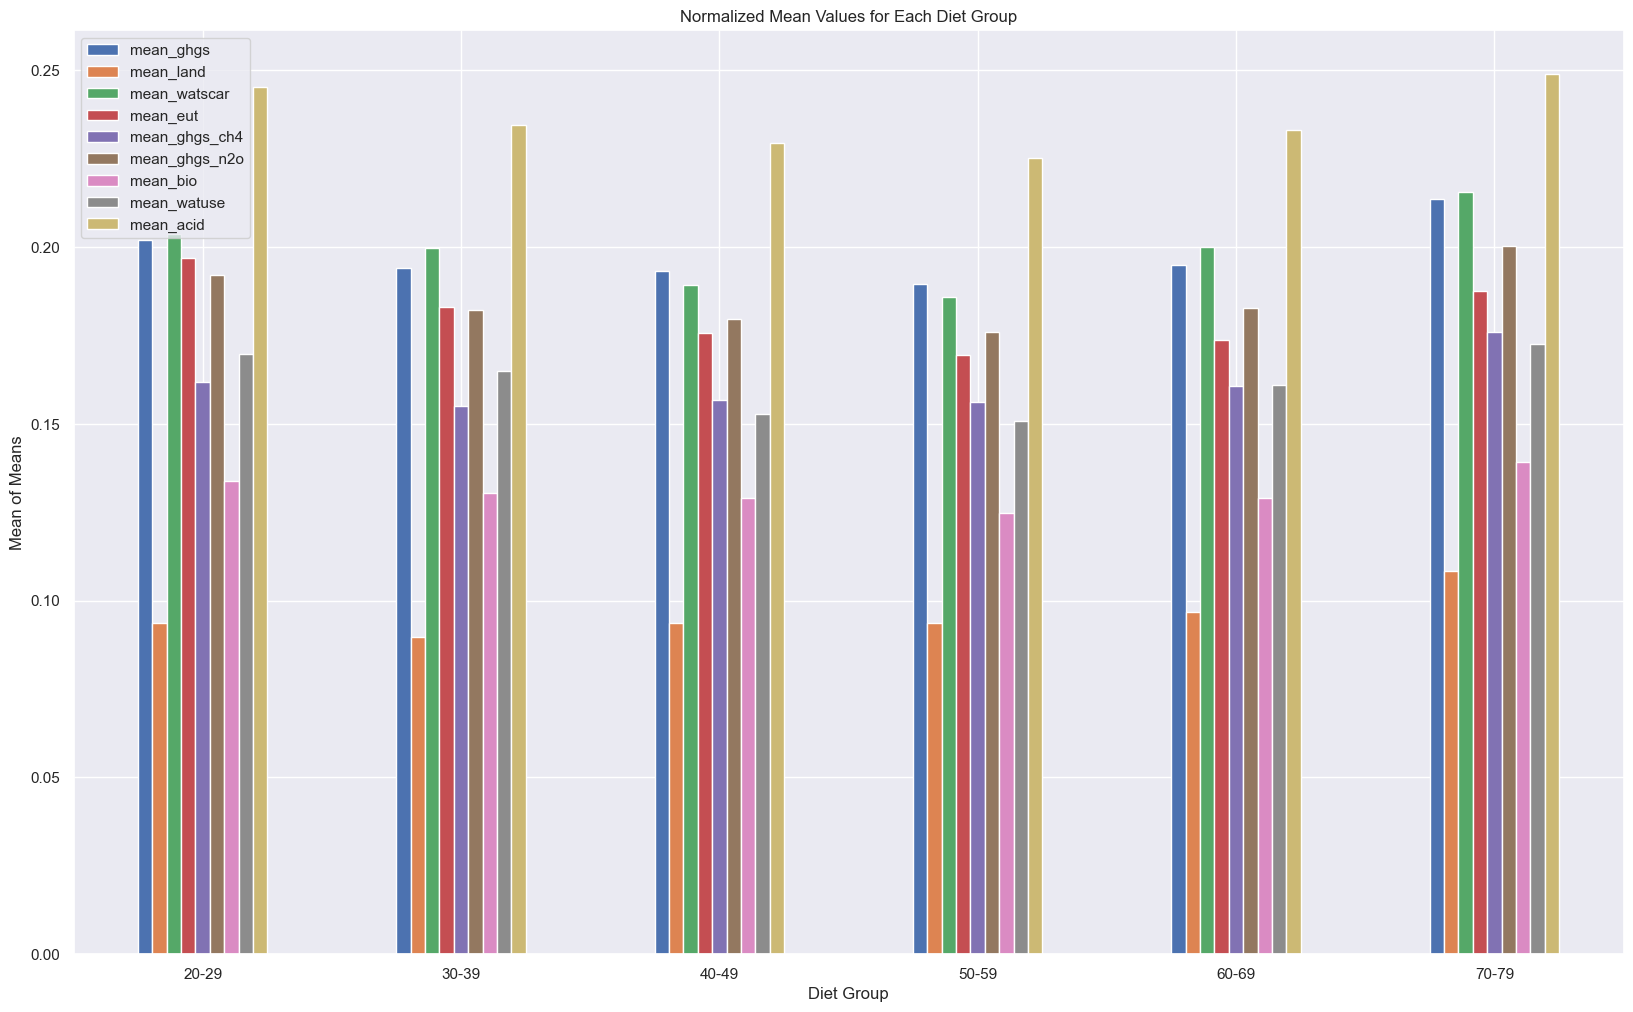

In [11]:
age.plot(kind='bar', figsize=(20, 12))
plt.xlabel('Aged Group')
plt.ylabel('Mean of Means')
plt.title('Normalized Mean Values for Each Aged Group')
plt.xticks(rotation=0)
plt.show()

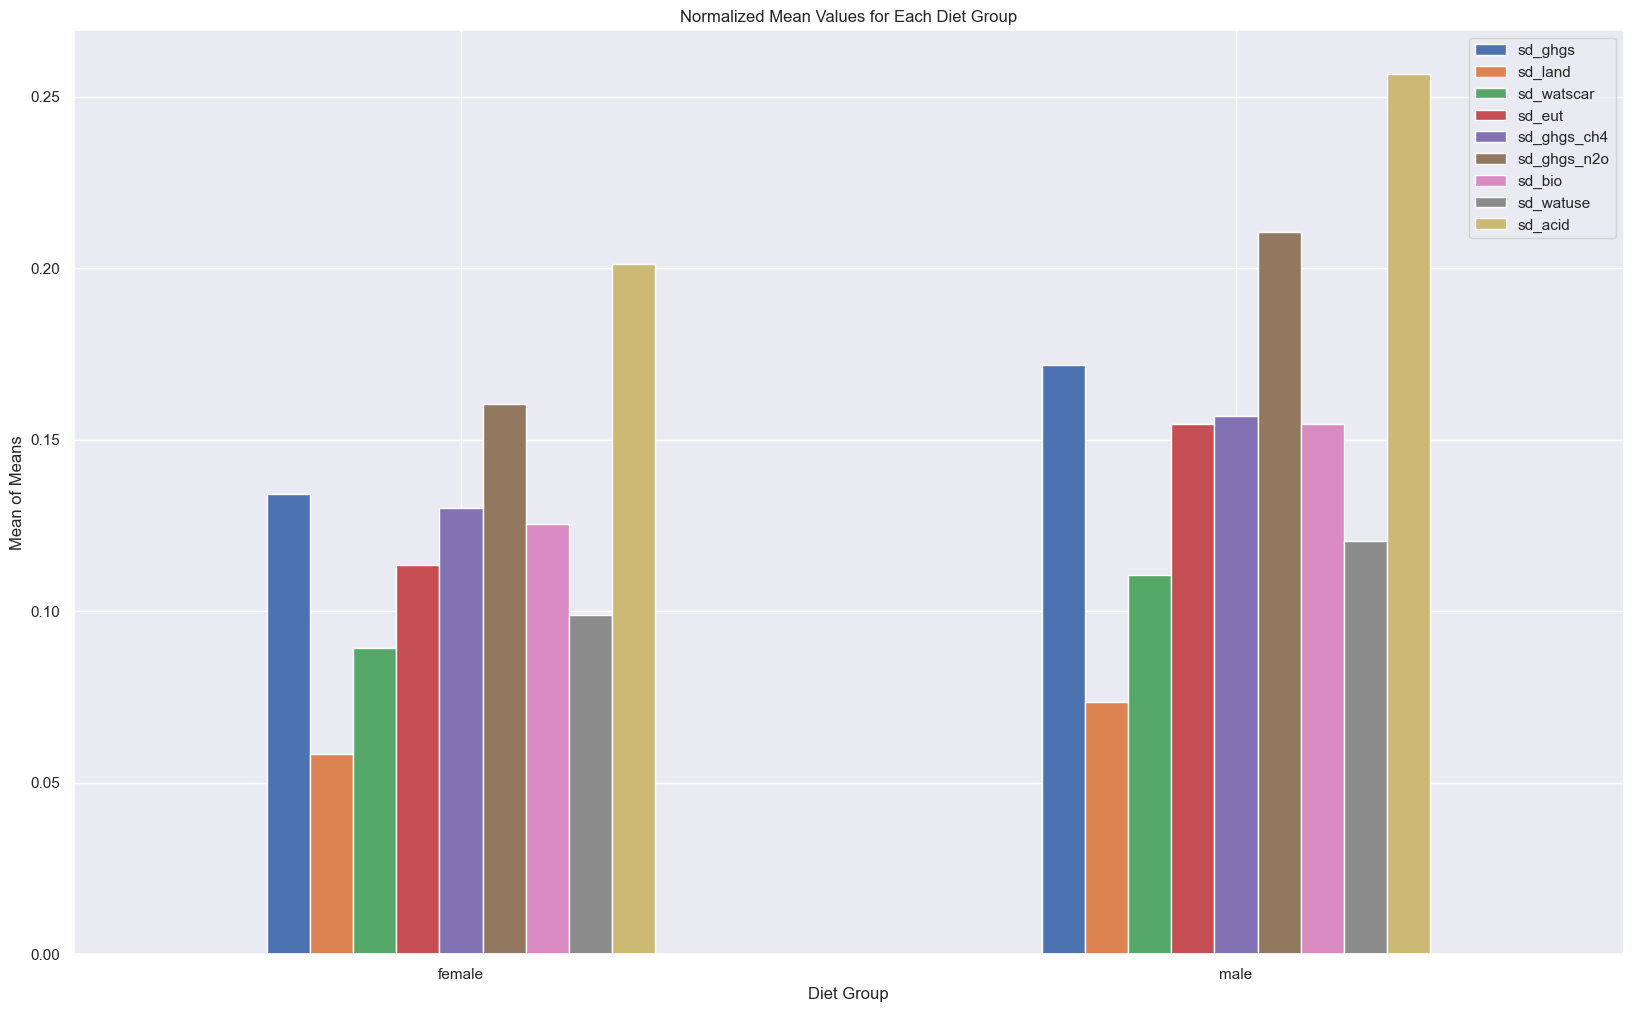

In [12]:
sex_sd.plot(kind='bar', figsize=(20, 12))
plt.xlabel('Aged Group')
plt.ylabel('Mean of Means')
plt.title('Normalized Mean Values for Each Aged Group')
plt.xticks(rotation=0)
plt.show()

/var/folders/h6/997_hqpj08vbfw0_1ddgs11r0000gn/T/ipykernel_7268/1748291709.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='n_participants_averages', y='Average sd', data=averages_df,  ci=None)
/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cate

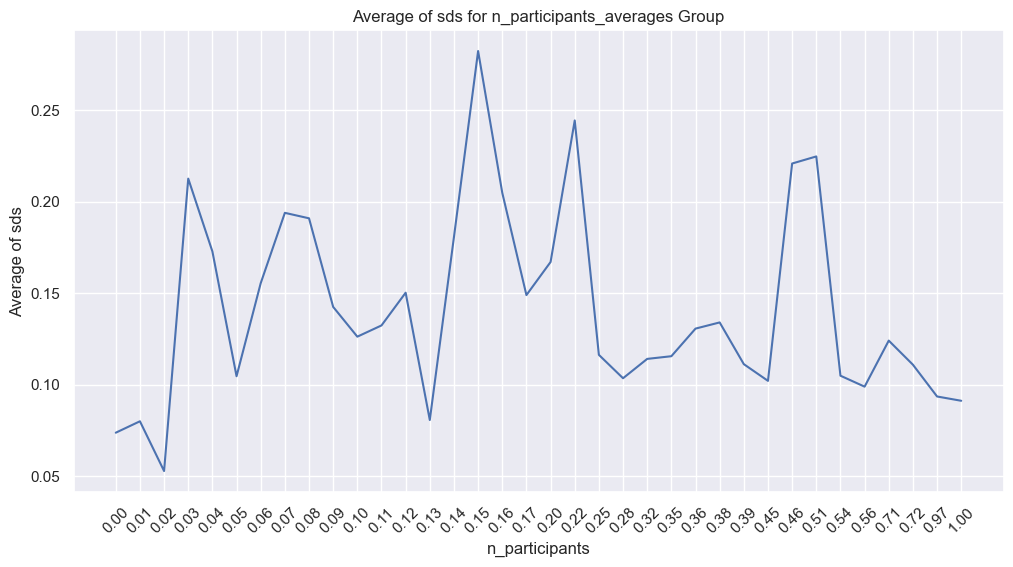

In [13]:
# Calculate the mean across all 'mean_' columns for each row
grouped_sd = sd_df.groupby(all_df['n_participants']).mean()

n_participants_averages = grouped_sd.mean(axis=1)

# Create a new DataFrame with these averages and the corresponding diet group as the index
averages_df = pd.DataFrame({'Average sd': n_participants_averages})
averages_df['n_participants_averages'] = grouped_sd.index
averages_df['n_participants_averages'] = averages_df['n_participants_averages'].apply(lambda x: f"{x:.2f}")

# Now plot the category-wise averages
plt.figure(figsize=(12, 6))
sns.lineplot(x='n_participants_averages', y='Average sd', data=averages_df,  ci=None)
plt.title('Average of sds for n_participants_averages Group')
plt.xlabel('n_participants')
plt.ylabel('Average of sds')


plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [14]:

new_df=mean_df
new_df['group']= all_df['diet_group']


/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zeyanghao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Figure size 4000x1200 with 0 Axes>

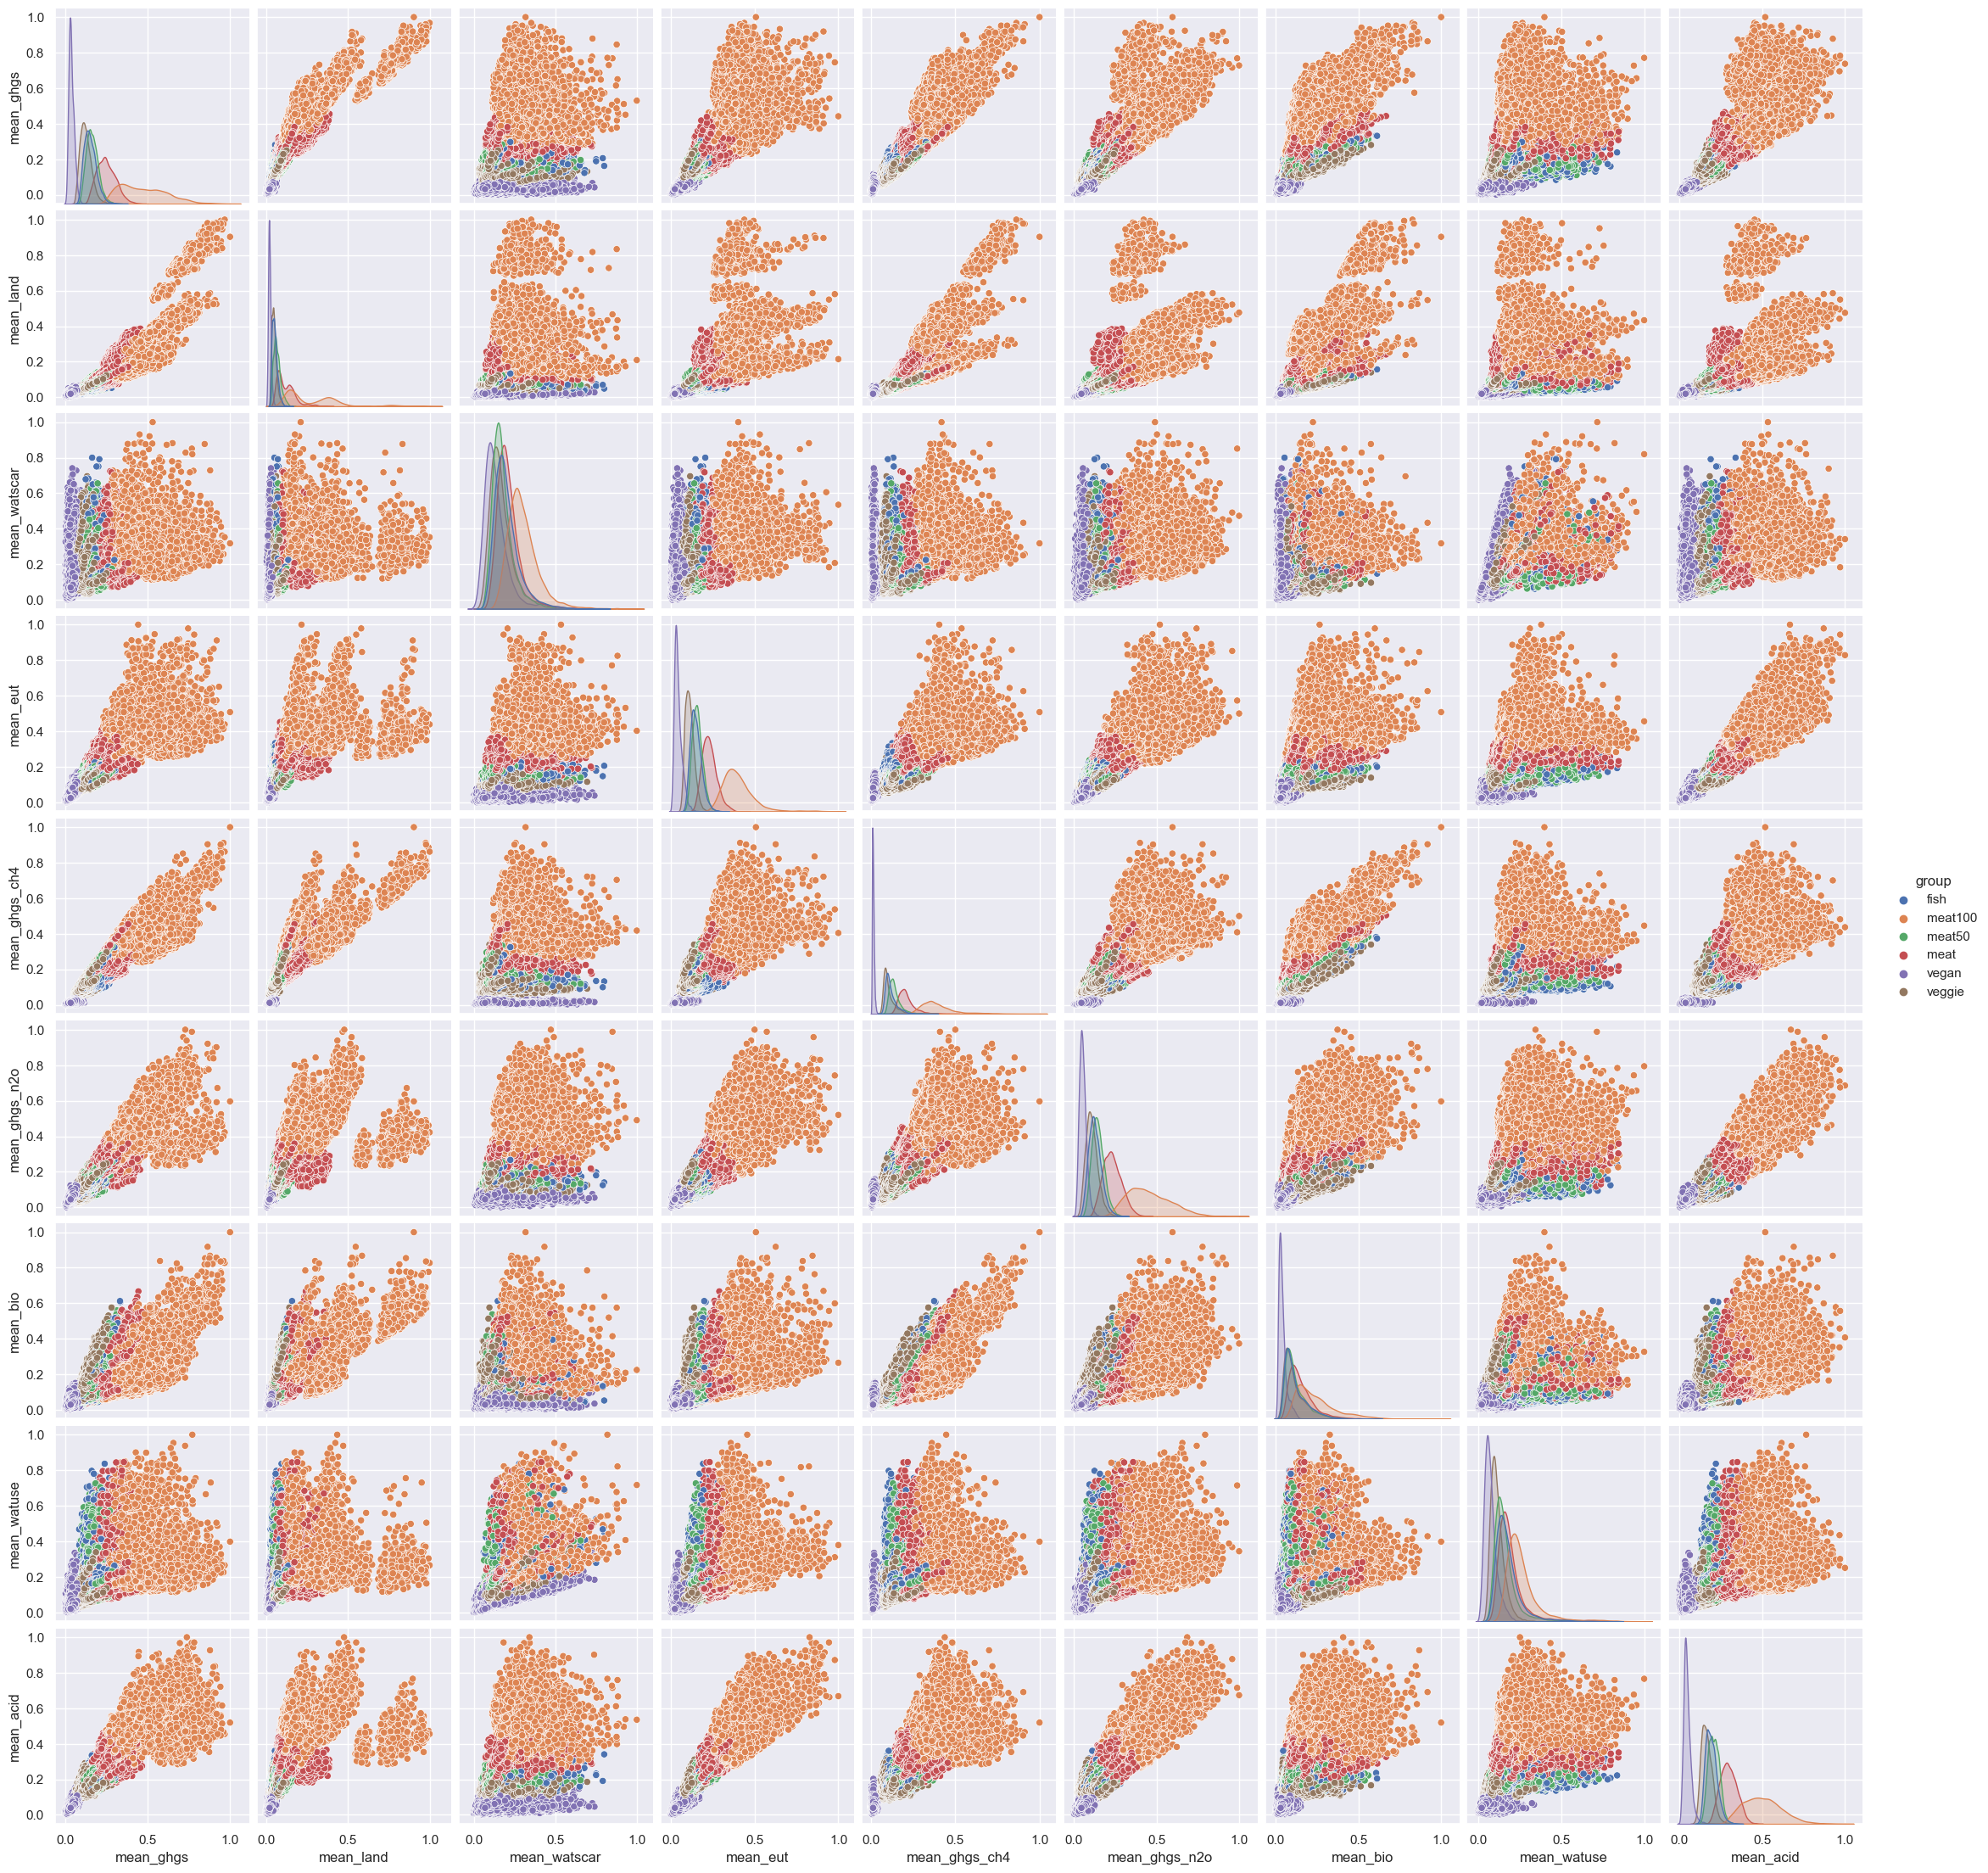

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


mean_df['group']= all_df['diet_group']
# Pairplot (scatterplot matrix) with Seaborn
plt.figure(figsize=(40, 12)) 
sns.pairplot(mean_df, hue='group')  
plt.savefig('image.png')
plt.show()
